In [2]:
import pandas as pd
df = pd.read_csv('/home/vivek/datasets/avocado.csv')

In [25]:
df.head()
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.tail(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [8]:
df['AveragePrice'].head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [10]:
albany_df = df[df['region'] == 'Albany']
albany_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
albany_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            17603, 17604, 17605, 17606, 17607, 17608, 17609, 17610, 17611,
            17612],
           dtype='int64', length=338)

In [33]:
albany_df = albany_df.set_index('Date')

KeyError: 'Date'

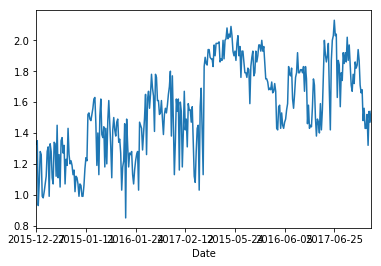

In [32]:
albany_df['AveragePrice'].plot()

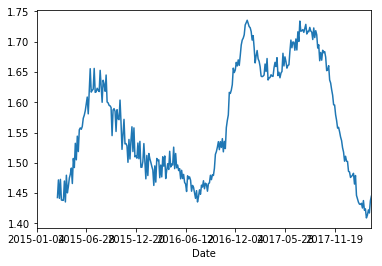

In [38]:
albany_df.sort_index(inplace=True)
albany_df['AveragePrice'].rolling(2).mean().plot()

In [41]:
 albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

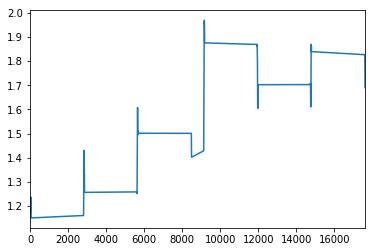

In [43]:
albany_df = df.copy()[df['region'] == 'Albany']
albany_df.set_index('Date')
albany_df.sort_index(inplace=True)
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25 albany_df['price25ma'] = ).mean().plot()


In [47]:
list(set(df['region'].values.tolist()))

['Boston',
 'GrandRapids',
 'Indianapolis',
 'NewOrleansMobile',
 'West',
 'Albany',
 'Louisville',
 'Denver',
 'SanDiego',
 'SanFrancisco',
 'Columbus',
 'Boise',
 'HartfordSpringfield',
 'Pittsburgh',
 'Syracuse',
 'Orlando',
 'Spokane',
 'Midsouth',
 'Detroit',
 'NorthernNewEngland',
 'LasVegas',
 'HarrisburgScranton',
 'California',
 'Portland',
 'SouthCentral',
 'Tampa',
 'NewYork',
 'MiamiFtLauderdale',
 'Plains',
 'WestTexNewMexico',
 'TotalUS',
 'BaltimoreWashington',
 'Northeast',
 'Charlotte',
 'DallasFtWorth',
 'Seattle',
 'Jacksonville',
 'BuffaloRochester',
 'Nashville',
 'RichmondNorfolk',
 'Philadelphia',
 'StLouis',
 'PhoenixTucson',
 'Houston',
 'Roanoke',
 'Sacramento',
 'Chicago',
 'SouthCarolina',
 'Southeast',
 'LosAngeles',
 'CincinnatiDayton',
 'GreatLakes',
 'Atlanta',
 'RaleighGreensboro']

In [48]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [51]:
graph_df = pd.DataFrame()
for region in df['region'].unique()[:16]:
    region_df = df.copy()[df['region'] == region]
    region_df.set_index('Date')
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
        

In [52]:
df.tail(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [66]:
import pandas as pd
df = pd.read_csv('/home/vivek/datasets/avocado.csv')
df = df.copy()[df['type'] == 'organic']
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by='Date', ascending=True, inplace=True)
graph_df = pd.DataFrame()
if graph_df.empty:
    print('Empty')
for region in df['region'].unique():
    region_df = df.copy()[df['region'] == region]
    region_df.set_index('Date',inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
graph_df.tail()

Empty


,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,...,Houston_price25ma,Chicago_price25ma,Plains_price25ma,Indianapolis_price25ma,SouthCentral_price25ma,Columbus_price25ma,Albany_price25ma,Detroit_price25ma,NewOrleansMobile_price25ma,NewYork_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


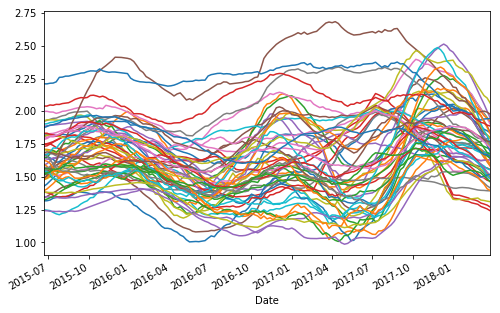

In [57]:
 graph_df.dropna().plot(figsize=(8,5),legend = False)

In [62]:
df = pd.DataFrame({'x': [1,2]})
df_sub = df[0:1]
df_sub.x = -1
df

/home/vivek/anaconda2/envs/myenv/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,x
0,-1
1,2


In [64]:
df = pd.DataFrame({'x': [1,2]})
df_Sub = df[0:1].copy()
df_Sub.x = -1
df

,x
0,1
1,2
